In [1]:
from fimdpenv import setup
setup()

# Quantify the effect of GoalLeaning Heuristics

In this section, we try to quantify the effect of goalleaning heuristic on the improvement in mission performance. Specifically, we try to calculate the expected time steps to reach a target in a specific environment for both GoalLeaningES solver and BasicES solver and support the results obtained in this study with instances showing behavior of the agent leading to a near-optimal behavior.

The animate_simulation functionbelow is different from the animate_simulation method available in SingleAgentEnv class. This function, defined in uuvmodel.py, returns the animation, state data, and energy data to help with creating static plots of events of interest. To create these plots, observe the animation below and note down the time steps for frames that one intends to see in the static plot. These time steps can be enteres in the visualize_snapshots function below which creates a figure with subplots showing all the snapshots. 

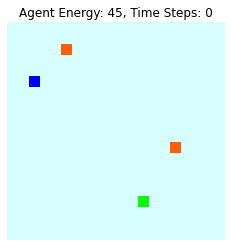

In [3]:
# create test environment
from uuvmodel import create_env
env = create_env('2R-1T-simple', capacity=45)
env

## Comparison - BasicES, GoalLeaningES, and GoalLeaningES with threshold

In [4]:
# visualize BasicES and GoalLeaningES
from uuvmodel import animate_simulation, calc_exptimetotarget, visualize_multisnapshots
from fimdp.energy_solvers import GoalLeaningES, BasicES
from fimdp.objectives import AS_REACH, BUCHI, MIN_INIT_CONS, POS_REACH, SAFE

### BasicES

In [5]:
# BasicES
env.create_counterstrategy(solver=BasicES, objective=BUCHI)
anim, im_basic, energy_basic = animate_simulation(env, num_steps=100)
anim

### GoalLeaningES without Threshold

In [6]:
# GoalLeaningES with threshold = 0
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0)
anim, im_gl00, energy_gl00 = animate_simulation(env, num_steps=100)
anim

In [7]:
calc_exptimetotarget(env, num_runs=1000)

44.926

### GoalLeaningES with Threshold 0.1

In [8]:
# GoalLeaningES with threshold = 0.1
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.1)
anim, im_gl01, energy_gl01 = animate_simulation(env, num_steps=100)
anim

In [9]:
calc_exptimetotarget(env, num_runs=1000)

45.772

### GoalLeaningES with Threshold 0.7

In [14]:
# GoalLeaningES with threshold = 0.7
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.7)
anim, im_gl07, energy_gl07 = animate_simulation(env, num_steps=100)
anim

In [15]:
calc_exptimetotarget(env, num_runs=1000)

27.0

### GoalLeaningES with Threshold 1

In [12]:
# GoalLeaningES with threshold = 1
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=1)
anim, im_gl1, energy_gl1 = animate_simulation(env, num_steps=100)
anim

In [13]:
calc_exptimetotarget(env, num_runs=1000)

27.0

## Extracting snapshots of different solvers for the paper

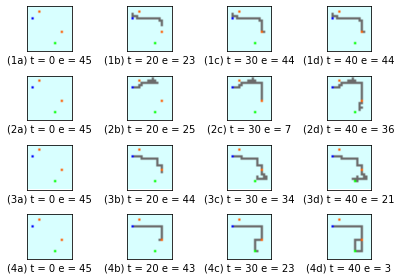

In [16]:
from uuvmodel import visualize_multisnapshots

im_history = [im_basic, im_gl00, im_gl01, im_gl1]
energy_history = [energy_basic, energy_gl00, energy_gl01, energy_gl1]
snapshot_indices = [[0, 20, 30, 40],[0, 20, 30, 40],[0, 20, 30, 40], [0, 20, 30, 40]]
visualize_multisnapshots(im_history, energy_history, snapshots_indices=snapshot_indices, annotate=True, filename='comparison')